In [98]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

DOWNLOAD_URLS = [
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/employee_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/general_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/in_time.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/manager_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/out_time.csv"
]
HOUSING_PATH = os.path.join("datasets", "employees")

def load_project_data(download_urls=DOWNLOAD_URLS, housing_path=HOUSING_PATH):    
    dataframes = {}
    
    for url in DOWNLOAD_URLS:
        file_name = url.split('/')[-1].split('.')[0]
        df = pd.read_csv(url)
        if df.keys()[0] != "EmployeeID":
            print(df.keys()[0])
            df.rename({df.keys()[0]:"EmployeeID"}, axis='columns', errors="raise", inplace=True)
        df.set_index("EmployeeID", inplace=True)
        dataframes[file_name] = df
    
    return dataframes

On peut maintenant importer les données :

In [99]:
data = load_project_data()
df = pd.concat(data.values(), axis=1, keys=data.keys())
df.head()

Unnamed: 0
Unnamed: 0


employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                              3.0             4.0             2.0   
2                              3.0             2.0             4.0   
3                              2.0             2.0             1.0   
4                              4.0             4.0             3.0   
5                              4.0             1.0             3.0   

           general_data                                                       \
                    Age Attrition     BusinessTravel              Department   
EmployeeID                                                                     
1                    51        No      Travel_Rarely                   Sales   
2                    31       Yes  Travel_Frequently  Research & Development   
3                    32        No  Travel_Frequently  Research & Development   
4                    38        No         Non-Travel  Research & Development   
5                    32        No      Travel_Rarely  Research & Development   

                                                      ...  \
           DistanceFromHome Education EducationField  ...   
EmployeeID                                            ...   
1                         6         2  Life Sciences  ...   
2                        10         1  Life Sciences  ...   
3                        17         4          Other  ...   
4                         2         5  Life Sciences  ...   
5                        10         1        Medical  ...   

                       out_time                                            \
                     2015-12-18           2015-12-21           2015-12-22   
EmployeeID                                                                  
1                           NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
2           2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
3           2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
4           2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
5           2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

                                                                 \
                     2015-12-23           2015-12-24 2015-12-25   
EmployeeID                                                        
1           2015-12-23 16:44:44  2015-12-24 17:47:22        NaN   
2           2015-12-23 17:38:18                  NaN        NaN   
3           2015-12-23 16:59:43  2015-12-24 16:58:25        NaN   
4           2015-12-23 17:36:35  2015-12-24 16:48:21        NaN   
5           2015-12-23 18:00:49  2015-12-24 17:59:22        NaN   

                                                                           \
                     2015-12-28           2015-12-29           2015-12-30   
EmployeeID                                                                  
1           2015-12-28 18:00:07  2015-12-29 17:22:30  2015-12-30 17:40:56   
2           2015-12-28 17:08:38  2015-12-29 17:54:46  2015-12-30 18:31:35   
3           2015-12-28 16:43:31  2015-12-29 17:09:56  2015-12-30 17:06:25   
4           2015-12-28 17:19:34  2015-12-29 16:58:16  2015-12-30 17:40:11   
5           2015-12-28 17:44:59  2015-12-29 18:47:00  2015-12-30 17:15:33   

                                 
                     2015-12-31  
EmployeeID                       
1           2015-12-31 17:17:33  
2           2015-12-31 17:40:58  
3           2015-12-31 17:15:50  
4           2015-12-31 17:09:14  
5           2015-12-31 17:42:14  

[5 rows x 550 columns]

On vérifie d'avoir le bon nombre de colonnes

In [100]:
df.columns.get_level_values(0).value_counts()

in_time                 261
out_time                261
general_data             23
employee_survey_data      3
manager_survey_data       2
dtype: int64

In [101]:
df.describe()

employee_survey_data                                 general_data  \
      EnvironmentSatisfaction JobSatisfaction WorkLifeBalance          Age   
count             4385.000000     4390.000000     4372.000000  4410.000000   
mean                 2.723603        2.728246        2.761436    36.923810   
std                  1.092756        1.101253        0.706245     9.133301   
min                  1.000000        1.000000        1.000000    18.000000   
25%                  2.000000        2.000000        2.000000    30.000000   
50%                  3.000000        3.000000        3.000000    36.000000   
75%                  4.000000        4.000000        3.000000    43.000000   
max                  4.000000        4.000000        4.000000    60.000000   

                                                                               \
      DistanceFromHome    Education EmployeeCount     JobLevel  MonthlyIncome   
count      4410.000000  4410.000000        4410.0  4410.000000    4410.000000   
mean          9.192517     2.912925           1.0     2.063946   65029.312925   
std           8.105026     1.023933           0.0     1.106689   47068.888559   
min           1.000000     1.000000           1.0     1.000000   10090.000000   
25%           2.000000     2.000000           1.0     1.000000   29110.000000   
50%           7.000000     3.000000           1.0     2.000000   49190.000000   
75%          14.000000     4.000000           1.0     3.000000   83800.000000   
max          29.000000     5.000000           1.0     5.000000  199990.000000   

                          ...   out_time                                   \
      NumCompaniesWorked  ... 2015-01-26 2015-03-05 2015-05-01 2015-07-17   
count        4391.000000  ...        0.0        0.0        0.0        0.0   
mean            2.694830  ...        NaN        NaN        NaN        NaN   
std             2.498887  ...        NaN        NaN        NaN        NaN   
min             0.000000  ...        NaN        NaN        NaN        NaN   
25%             1.000000  ...        NaN        NaN        NaN        NaN   
50%             2.000000  ...        NaN        NaN        NaN        NaN   
75%             4.000000  ...        NaN        NaN        NaN        NaN   
max             9.000000  ...        NaN        NaN        NaN        NaN   

                                                                         
      2015-09-17 2015-10-02 2015-11-09 2015-11-10 2015-11-11 2015-12-25  
count        0.0        0.0        0.0        0.0        0.0        0.0  
mean         NaN        NaN        NaN        NaN        NaN        NaN  
std          NaN        NaN        NaN        NaN        NaN        NaN  
min          NaN        NaN        NaN        NaN        NaN        NaN  
25%          NaN        NaN        NaN        NaN        NaN        NaN  
50%          NaN        NaN        NaN        NaN        NaN        NaN  
75%          NaN        NaN        NaN        NaN        NaN        NaN  
max          NaN        NaN        NaN        NaN        NaN        NaN  

[8 rows x 44 columns]

Affichage des datas

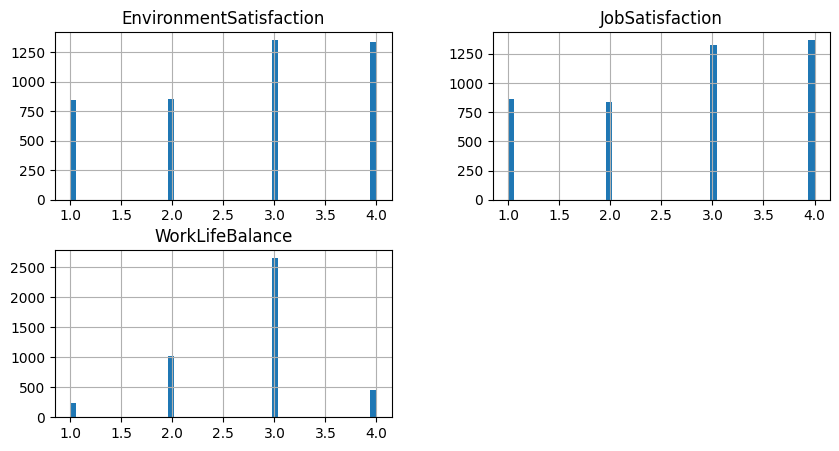

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
df['employee_survey_data'].hist(bins=50, figsize=(10,5))
plt.show()

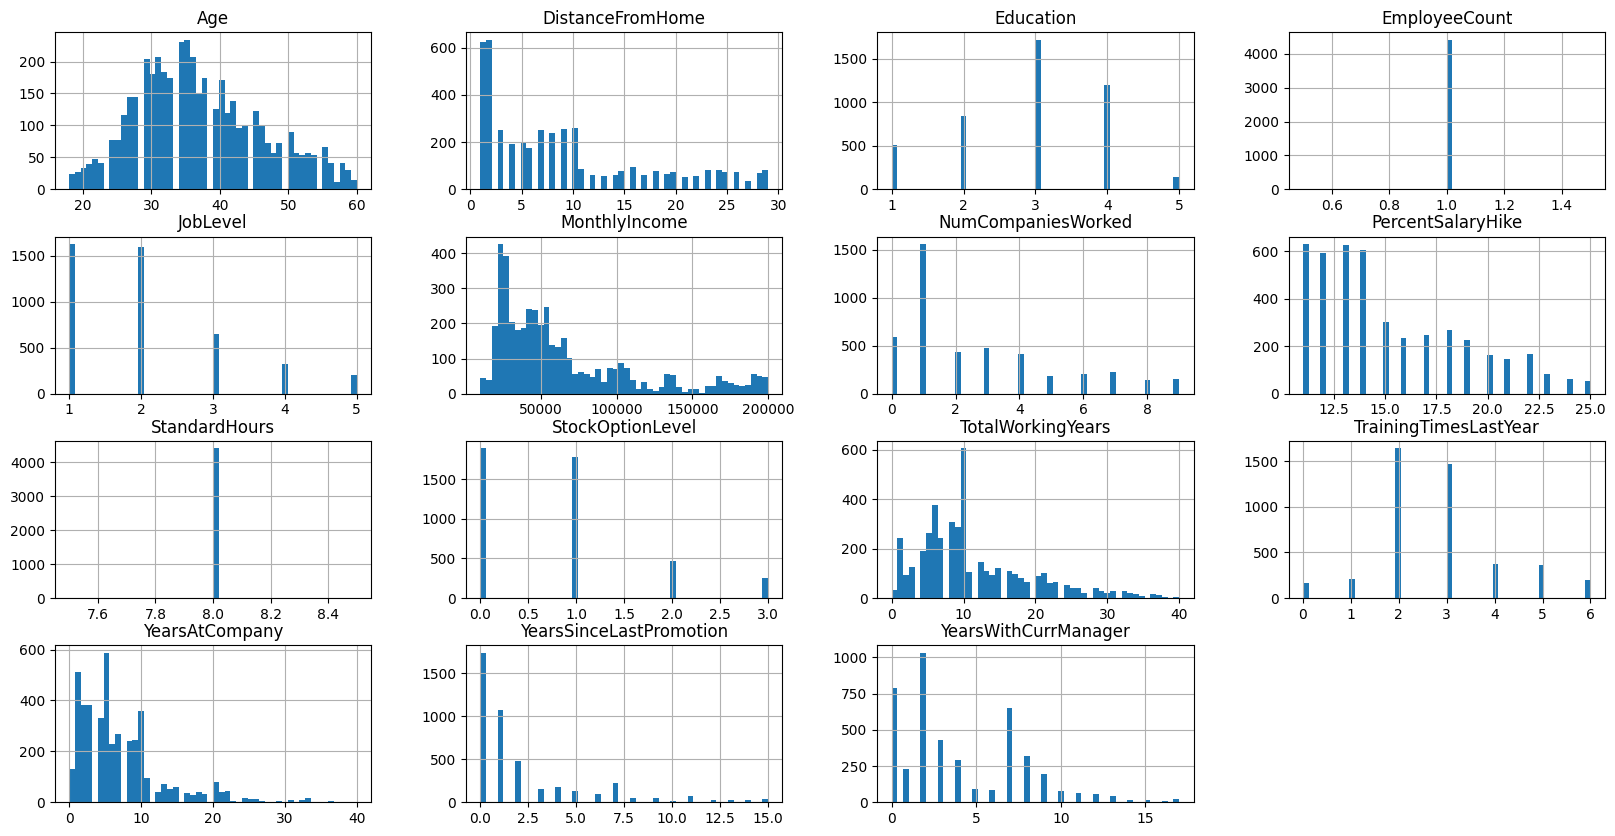

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
df['general_data'].hist(bins=50, figsize=(20,10))
plt.show()

Encoder les non numérique et remplir les vides

In [104]:
from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import is_numeric_dtype

def encodeNonNumericColumns(df, table_name):
    table = data[table_name]
    fields_encoded = {}

    for column in table.columns:
        if not is_numeric_dtype(table[column]):
            field = table[[column]]
            ordinal_encoder = OrdinalEncoder()
            field_encoded = ordinal_encoder.fit_transform(field)
            fields_encoded[column] = field_encoded

    for key in fields_encoded.keys():
        df.loc[:, (table_name, key)] = fields_encoded[key]

def fillEmptyValues(df, table_name):
    table = df[table_name]
    for column in table.columns:
        if not is_numeric_dtype(table[column]):
            median = 0.0
        else:
            median = table[column].median()
        df.loc[:, (table_name, column)].fillna(median, inplace=True)

def checkIfTableIsFull(df, table_name):
    table = df[table_name]
    res = True
    for column in table.columns:
        if df.loc[:, (table_name, column)].isnull().any():
            res = False
    print(res)

df_non_ethical = df.copy()

encodeNonNumericColumns(df_non_ethical, "general_data")

fillEmptyValues(df_non_ethical, "general_data")
fillEmptyValues(df_non_ethical, "employee_survey_data")
fillEmptyValues(df_non_ethical, "manager_survey_data")

df_non_ethical.head()

C:\Users\romai\AppData\Local\Temp\ipykernel_17488\1676746924.py:16: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, (table_name, key)] = fields_encoded[key]


employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                              3.0             4.0             2.0   
2                              3.0             2.0             4.0   
3                              2.0             2.0             1.0   
4                              4.0             4.0             3.0   
5                              4.0             1.0             3.0   

           general_data                                                       \
                    Age Attrition BusinessTravel Department DistanceFromHome   
EmployeeID                                                                     
1                    51       0.0            2.0        2.0                6   
2                    31       1.0            1.0        1.0               10   
3                    32       0.0            1.0        1.0               17   
4                    38       0.0            0.0        1.0                2   
5                    32       0.0            2.0        1.0               10   

                                     ...             out_time  \
           Education EducationField  ...           2015-12-18   
EmployeeID                           ...                        
1                  2            1.0  ...                  NaN   
2                  1            1.0  ...  2015-12-18 18:31:28   
3                  4            4.0  ...  2015-12-18 17:02:23   
4                  5            1.0  ...  2015-12-18 17:55:23   
5                  1            3.0  ...  2015-12-18 17:52:48   

                                                                           \
                     2015-12-21           2015-12-22           2015-12-23   
EmployeeID                                                                  
1           2015-12-21 17:15:50  2015-12-22 17:27:51  2015-12-23 16:44:44   
2           2015-12-21 17:34:16  2015-12-22 18:16:35  2015-12-23 17:38:18   
3           2015-12-21 17:20:17  2015-12-22 16:32:50  2015-12-23 16:59:43   
4           2015-12-21 16:49:09  2015-12-22 17:24:00  2015-12-23 17:36:35   
5           2015-12-21 17:43:35  2015-12-22 18:07:57  2015-12-23 18:00:49   

                                                                 \
                     2015-12-24 2015-12-25           2015-12-28   
EmployeeID                                                        
1           2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
2                           NaN        NaN  2015-12-28 17:08:38   
3           2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
4           2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
5           2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

                                                                           
                     2015-12-29           2015-12-30           2015-12-31  
EmployeeID                                                                 
1           2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
2           2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
3           2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
4           2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
5           2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 550 columns]

In [105]:
df_non_ethical.head()

employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                              3.0             4.0             2.0   
2                              3.0             2.0             4.0   
3                              2.0             2.0             1.0   
4                              4.0             4.0             3.0   
5                              4.0             1.0             3.0   

           general_data                                                       \
                    Age Attrition BusinessTravel Department DistanceFromHome   
EmployeeID                                                                     
1                    51       0.0            2.0        2.0                6   
2                    31       1.0            1.0        1.0               10   
3                    32       0.0            1.0        1.0               17   
4                    38       0.0            0.0        1.0                2   
5                    32       0.0            2.0        1.0               10   

                                     ...             out_time  \
           Education EducationField  ...           2015-12-18   
EmployeeID                           ...                        
1                  2            1.0  ...                  NaN   
2                  1            1.0  ...  2015-12-18 18:31:28   
3                  4            4.0  ...  2015-12-18 17:02:23   
4                  5            1.0  ...  2015-12-18 17:55:23   
5                  1            3.0  ...  2015-12-18 17:52:48   

                                                                           \
                     2015-12-21           2015-12-22           2015-12-23   
EmployeeID                                                                  
1           2015-12-21 17:15:50  2015-12-22 17:27:51  2015-12-23 16:44:44   
2           2015-12-21 17:34:16  2015-12-22 18:16:35  2015-12-23 17:38:18   
3           2015-12-21 17:20:17  2015-12-22 16:32:50  2015-12-23 16:59:43   
4           2015-12-21 16:49:09  2015-12-22 17:24:00  2015-12-23 17:36:35   
5           2015-12-21 17:43:35  2015-12-22 18:07:57  2015-12-23 18:00:49   

                                                                 \
                     2015-12-24 2015-12-25           2015-12-28   
EmployeeID                                                        
1           2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
2                           NaN        NaN  2015-12-28 17:08:38   
3           2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
4           2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
5           2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

                                                                           
                     2015-12-29           2015-12-30           2015-12-31  
EmployeeID                                                                 
1           2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
2           2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
3           2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
4           2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
5           2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 550 columns]

In [106]:
# transforme dates dans df['out_time'] et df['in_time'] en numérique
from datetime import datetime
from pandas.api.types import is_numeric_dtype

def transformDateToNumeric(df, table_name):
    table = df[table_name]
    for column in table.columns:
        if not is_numeric_dtype(table[column]):
            df.loc[:, (table_name, column)] = df.loc[:, (table_name, column)].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp() if not pd.isna(x) else x)

# remmetre les colonnes date numérique en date
from datetime import datetime
from pandas.api.types import is_numeric_dtype

def transformNumericToDate(df, table_name):
    table = df[table_name]
    for column in table.columns:
        if is_numeric_dtype(table[column]):
            df.loc[:, (table_name, column)] = df.loc[:, (table_name, column)].apply(lambda x: datetime.fromtimestamp(x) if not pd.isna(x) else x)

transformDateToNumeric(df_non_ethical, "out_time")
transformDateToNumeric(df_non_ethical, "in_time")
fillEmptyValues(df_non_ethical, "out_time")
fillEmptyValues(df_non_ethical, "in_time")

C:\Users\romai\AppData\Local\Temp\ipykernel_17488\1425232011.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, (table_name, column)] = df.loc[:, (table_name, column)].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp() if not pd.isna(x) else x)
C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out

In [107]:
# supprimer les colonnes dans lesquelles il y a des valeurs vides
def dropColumnsWithEmptyValues(df, table_name):
    table = df[table_name]
    for column in table.columns:
        if df.loc[:, (table_name, column)].isnull().any():
            df.drop((table_name, column), axis=1, inplace=True)

dropColumnsWithEmptyValues(df_non_ethical, "out_time")
dropColumnsWithEmptyValues(df_non_ethical, "in_time")

df_non_ethical.head()

employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                              3.0             4.0             2.0   
2                              3.0             2.0             4.0   
3                              2.0             2.0             1.0   
4                              4.0             4.0             3.0   
5                              4.0             1.0             3.0   

           general_data                                                       \
                    Age Attrition BusinessTravel Department DistanceFromHome   
EmployeeID                                                                     
1                    51       0.0            2.0        2.0                6   
2                    31       1.0            1.0        1.0               10   
3                    32       0.0            1.0        1.0               17   
4                    38       0.0            0.0        1.0                2   
5                    32       0.0            2.0        1.0               10   

                                     ...      out_time                \
           Education EducationField  ...    2015-12-17    2015-12-18   
EmployeeID                           ...                               
1                  2            1.0  ...  1.450369e+09  1.450456e+09   
2                  1            1.0  ...  1.450369e+09  1.450460e+09   
3                  4            4.0  ...  1.450368e+09  1.450455e+09   
4                  5            1.0  ...  1.450369e+09  1.450458e+09   
5                  1            3.0  ...  1.450372e+09  1.450458e+09   

                                                                    \
              2015-12-21    2015-12-22    2015-12-23    2015-12-24   
EmployeeID                                                           
1           1.450715e+09  1.450802e+09  1.450885e+09  1.450976e+09   
2           1.450716e+09  1.450805e+09  1.450889e+09  1.450974e+09   
3           1.450715e+09  1.450798e+09  1.450886e+09  1.450973e+09   
4           1.450713e+09  1.450801e+09  1.450889e+09  1.450972e+09   
5           1.450716e+09  1.450804e+09  1.450890e+09  1.450976e+09   

                                                                    
              2015-12-28    2015-12-29    2015-12-30    2015-12-31  
EmployeeID                                                          
1           1.451322e+09  1.451406e+09  1.451494e+09  1.451579e+09  
2           1.451319e+09  1.451408e+09  1.451497e+09  1.451580e+09  
3           1.451317e+09  1.451405e+09  1.451492e+09  1.451579e+09  
4           1.451320e+09  1.451405e+09  1.451494e+09  1.451578e+09  
5           1.451321e+09  1.451411e+09  1.451492e+09  1.451580e+09  

[5 rows x 526 columns]

array([[<Axes: title={'center': "('employee_survey_data', 'EnvironmentSatisfaction')"}>,
        <Axes: title={'center': "('employee_survey_data', 'JobSatisfaction')"}>,
        <Axes: title={'center': "('employee_survey_data', 'WorkLifeBalance')"}>,
        <Axes: title={'center': "('general_data', 'Age')"}>,
        <Axes: title={'center': "('general_data', 'Attrition')"}>,
        <Axes: title={'center': "('general_data', 'BusinessTravel')"}>,
        <Axes: title={'center': "('general_data', 'Department')"}>,
        <Axes: title={'center': "('general_data', 'DistanceFromHome')"}>,
        <Axes: title={'center': "('general_data', 'Education')"}>,
        <Axes: title={'center': "('general_data', 'EducationField')"}>,
        <Axes: title={'center': "('general_data', 'EmployeeCount')"}>,
        <Axes: title={'center': "('general_data', 'Gender')"}>,
        <Axes: title={'center': "('general_data', 'JobLevel')"}>,
        <Axes: title={'center': "('general_data', 'JobRole')"}>,
  

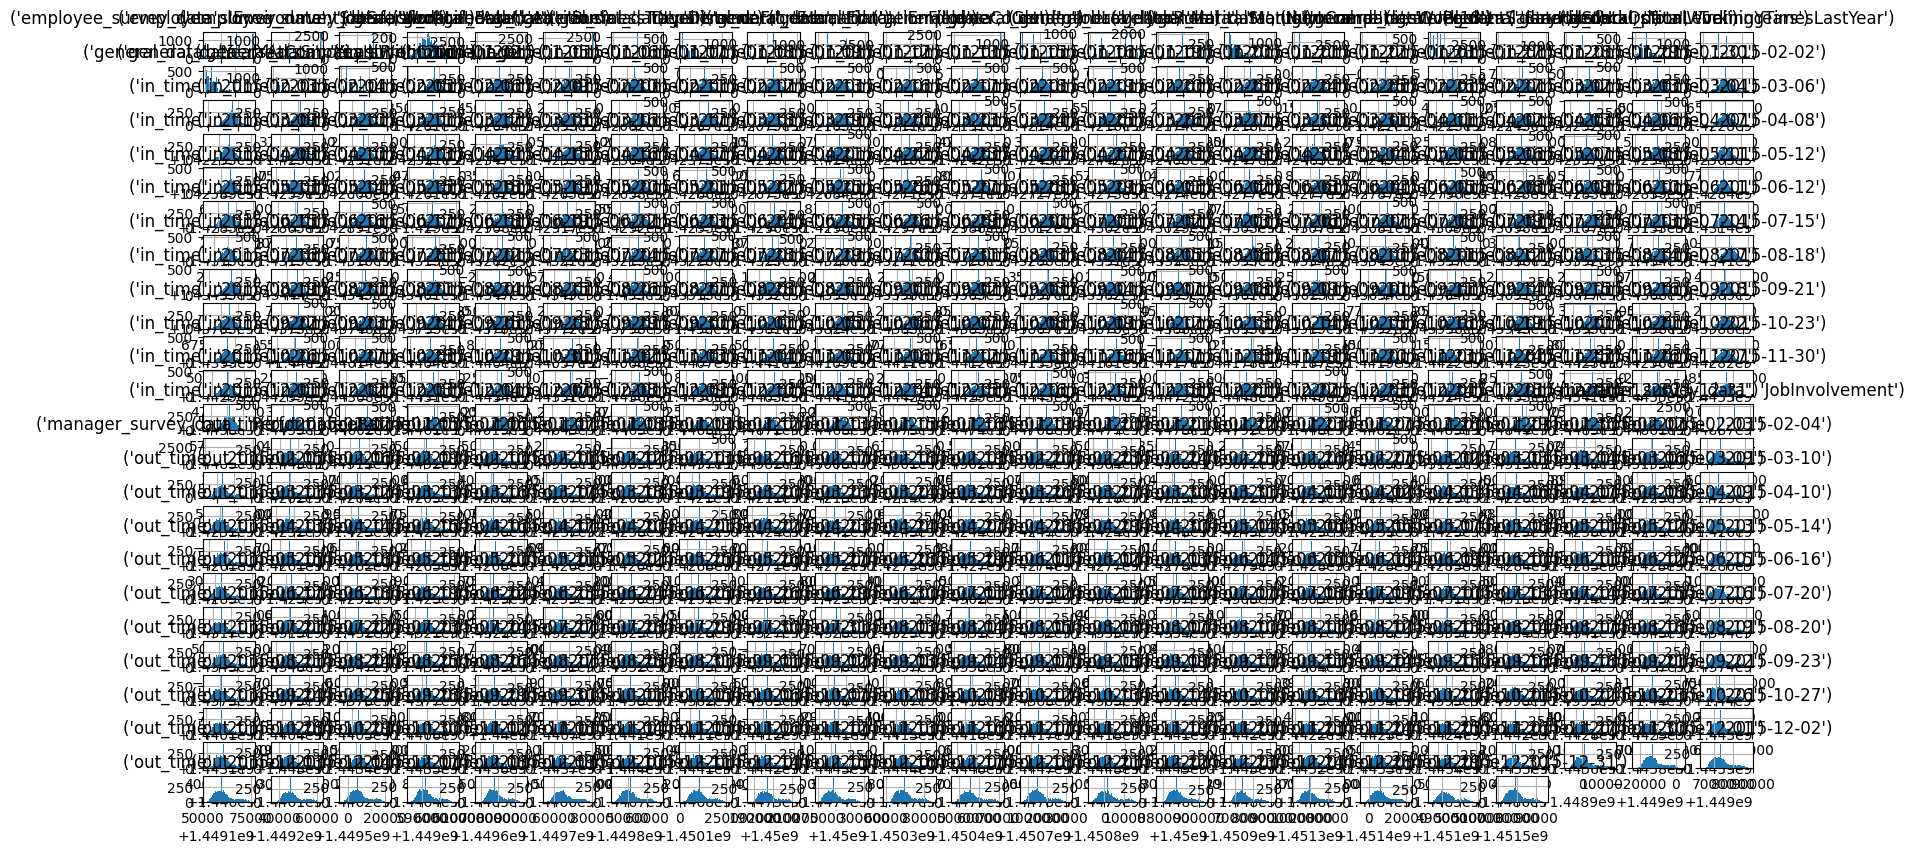

In [109]:
df_non_ethical.hist(bins=50, figsize=(20,10))